<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 *The use of Kernel PCA is used, which is a data transformation technique to increase the dimension of the data and in turn transform the data through a kernel function, which aims to take it to a new n-dimensional space. in which the data can be separable or correctly classifiable.*

Example:

>> <img src=https://ml-lectures.org/_images/circles_pca_kpca.png   width=400 height=300>

*A common choice for the kernel is known as the radial basis function kernel (RBF) defined by:*

$KRFB(x,y)=\exp(-\gamma || x-y || ^2)$

*where $\gamma$ is a tunable parameter. Using the RBF kernel, we compare the result of kernel PCA with that of standard PCA, as shown on the right of Fig. 5. It is clear that kernel PCA leads to a meaningful separation of the data while standard PCA completely fails.*


In [8]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [97]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import pandas as pd

In [168]:
X = pd.DataFrame(iris.data[:, :4])  # we only take the first two features.
Y = pd.DataFrame(iris.target,columns=["class"])
name = ["sepal length","sepal width","petal length","petal width"]
X.columns=name
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: xlabel='component1', ylabel='component2'>

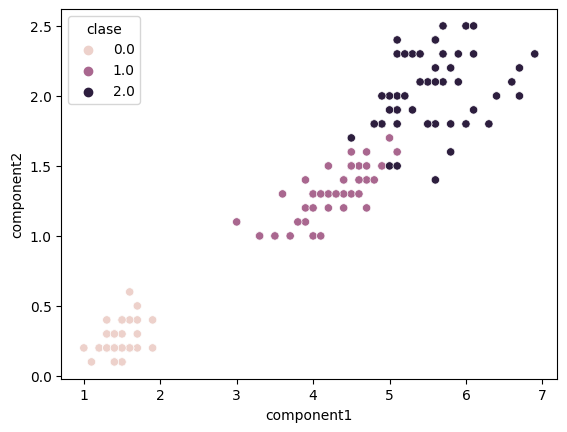

In [169]:
# Datos originales
X_2 = pd.DataFrame(np.hstack((X.iloc[:,2:4], Y.to_numpy().reshape(-1,1))),columns=['component1','component2','clase'])
sns.scatterplot(x = 'component1',y='component2',hue='clase',data=X_2)

#  PCA description

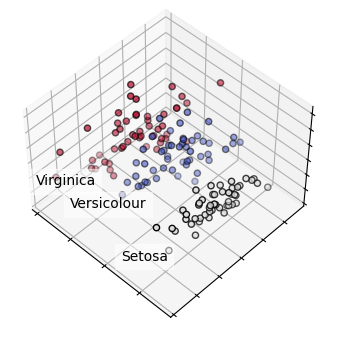

In [166]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(5, 4))

ax = fig.add_subplot(projection="3d", elev=48, azim=134)


pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment = "center",
        bbox=dict(alpha = 0.5, edgecolor = "w", facecolor = "w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="coolwarm_r", edgecolor="k")
# para que los ejes no esten enumerados
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Kernel PCA

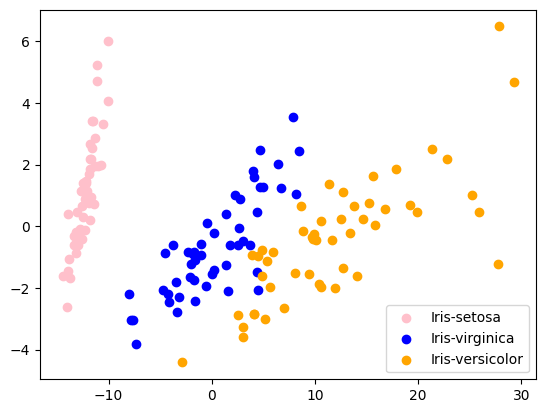

In [175]:
transformer = KernelPCA(n_components = 2,gamma = 0.1,kernel="poly")
X_pca = transformer.fit_transform(X)

plt.scatter(X_pca[Y["class"]==0, 0], X_pca[Y["class"]==0, 1], color='pink')
plt.scatter(X_pca[Y["class"]==1, 0], X_pca[Y["class"]==1, 1], color='blue')
plt.scatter(X_pca[Y["class"]==2, 0], X_pca[Y["class"]==2, 1], color='orange')
plt.legend(['Iris-setosa','Iris-virginica','Iris-versicolor'])

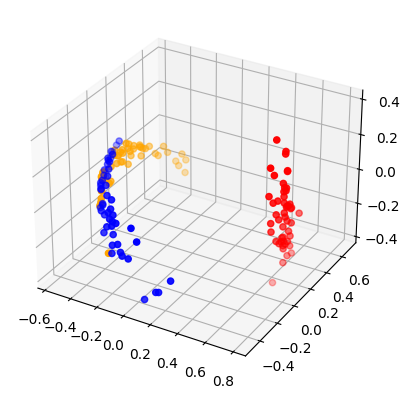

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection="3d")
transformer=KernelPCA(gamma=0.1, n_components=3, kernel="rbf")
X_pca = transformer.fit_transform(X)

ax.scatter3D(X_pca[Y["class"]==0, 0], X_pca[Y["class"]==0, 1], X_pca[Y["class"]==0, 2], c='red')
ax.scatter3D(X_pca[Y["class"]==1, 0], X_pca[Y["class"]==1, 1], X_pca[Y["class"]==1, 2], c='blue')
ax.scatter3D(X_pca[Y["class"]==2, 0], X_pca[Y["class"]==2, 1], X_pca[Y["class"]==2, 2], c='orange')
plt.show()


<Axes: xlabel='component1', ylabel='component2'>

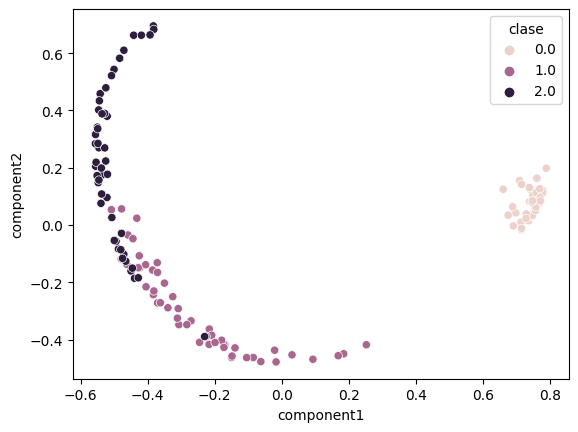

In [89]:
# Usando sklearn

kpca = KernelPCA(n_components=2,kernel='rbf',gamma=0.1)
X_kpca = kpca.fit_transform(X)

X_k = pd.DataFrame(np.hstack((X_kpca,pd.DataFrame(Y).to_numpy().reshape(-1,1))),columns=['component1','component2','clase'])
sns.scatterplot(x='component1',y='component2',hue='clase',data=X_k)
